In [28]:
using PyPlot
using LaTeXStrings

include("./useful_func.jl")
include("./logistic_func.jl")

logistic_result (generic function with 2 methods)

# Genrate Data 

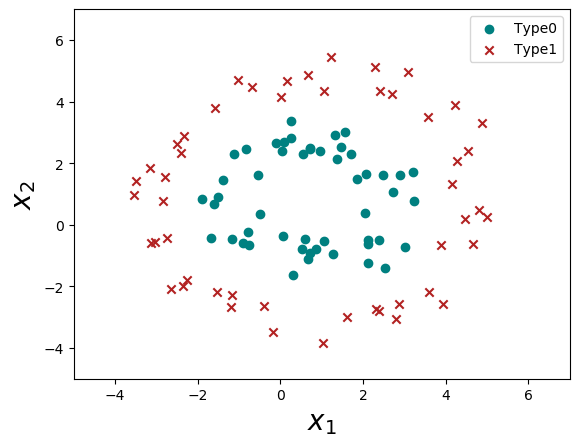

100×3 Array{Float64,2}:
  0.721142   2.45618  1.0
  1.38005    2.13728  1.0
  0.546892   2.29034  1.0
  1.5692     3.01014  1.0
  1.70583    2.28103  1.0
  1.3335     2.91557  1.0
  1.46692    2.52954  1.0
  1.84733    1.49801  1.0
  2.49598    1.62012  1.0
  3.2014     1.71494  1.0
  2.89468    1.6123   1.0
  2.07683    1.65443  1.0
  3.2401     0.75592  1.0
  ⋮                      
 -3.49961    1.43267  0.0
 -2.797      1.54233  0.0
 -3.15167    1.83747  0.0
 -2.40505    2.32411  0.0
 -2.50892    2.61184  0.0
 -2.32434    2.89394  0.0
 -1.57173    3.78275  0.0
 -1.01184    4.69636  0.0
 -0.681117   4.48301  0.0
  0.0119105  4.14461  0.0
  0.664658   4.8544   0.0
  0.171132   4.66554  0.0

In [207]:
num_sets = 50
distur = 1.5
data = zeros(2*num_sets, 3)

r = 2
θ = range(0, length=num_sets, stop=2*pi)
x1, x2 = r .* sin.(θ) .+ rand(num_sets).*distur, r .* cos.(θ) .+ rand(num_sets).*distur
data[1:num_sets, :] = [x1 x2 ones(num_sets)]
scatter(x1, x2, c="teal", label="Type0")

r = 4
x1, x2 = r .* sin.(θ) .+ rand(num_sets).*distur, r .* cos.(θ) .+ rand(num_sets).*distur
data[num_sets+1:end, :] = [x1 x2 zeros(num_sets)]
scatter(x1, x2, marker="x", c="firebrick", label="Type1")

xlabel(L"x_1", fontsize=20)
ylabel(L"x_2", fontsize=20)
legend(loc="best", fontsize=10)
xlim(-5, 7)
ylim(-5, 7)

savefig("example.svg", optimize=true, format="svg", transparent=true)

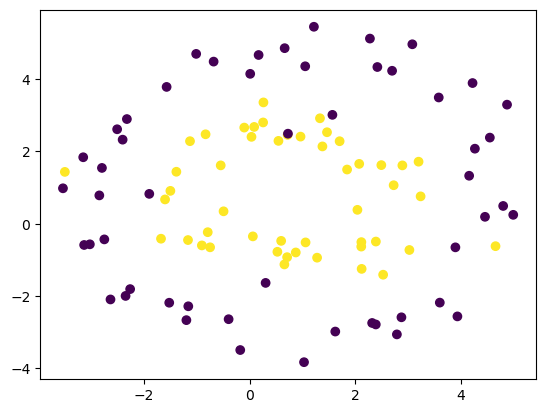

PyObject <matplotlib.collections.PathCollection object at 0x15d48ab50>

In [216]:
figure()
data[89, 3] = 1
scatter(data[:, 1], data[:, 2], c=data[:, 3])

In [240]:
degree = 10
input = [mapFeature(data[i, 1], data[i, 2], degree) for i =1:size(data)[1]]
input = Array(hcat(input...)')
output = data[:, end]

theta = zeros(size(input, 2))
alpha = 0.1
num_steps = 100000

for step = 1:num_steps
    theta .-= alpha .* logistic_grad(theta, input, output)
end

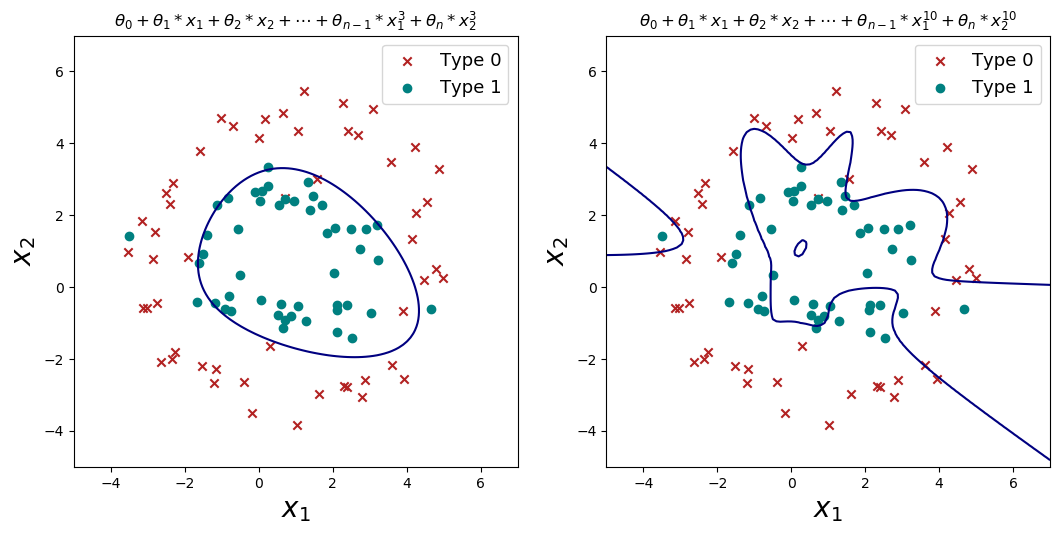

In [253]:
figure(figsize=[12.6, 5.6])
subplot(121)
degree = 3
input = [mapFeature(data[i, 1], data[i, 2], degree) for i =1:size(data)[1]]
input = Array(hcat(input...)')
output = data[:, end]

theta = zeros(size(input, 2))
alpha = 0.1
num_steps = 1000

for step = 1:num_steps
    theta .-= alpha .* logistic_grad(theta, input, output)
end

a = [n for n = -5:0.1:7]
b = [n for n = -5:0.1:7]
len = length(a)
a, b = meshgrid(a, b)
c = [logistic_result(theta, a[i, j], b[i, j], degree) for i = 1:len, j = 1: len]

type_0 = findall(x->x==0, output)
type_0 = [type_0[n][1] for n=1:length(type_0)]
type_1 = findall(x->x==1, output)
type_1 = [type_1[n][1] for n=1:length(type_1)]

scatter(input[type_0, 2], input[type_0, 3], marker="x", c="firebrick", label="Type 0")
scatter(input[type_1, 2], input[type_1, 3], marker="o", c="teal", label="Type 1")
contour(a,b,c, 0, colors="navy")

title(L"\theta_0 + \theta_1*x_1 + \theta_2*x_2 + \cdots + \theta_{n-1}*x_1^3 + \theta_{n}*x_2^3")
xlabel(L"$x_1$", fontsize=20)
ylabel(L"$x_2$", fontsize=20)
legend(loc="best", fontsize=13)
savefig("res_over.svg", optimize=true, format="svg", transparent=true)

subplot(122)
degree = 10
input = [mapFeature(data[i, 1], data[i, 2], degree) for i =1:size(data)[1]]
input = Array(hcat(input...)')
output = data[:, end]

theta = zeros(size(input, 2))
alpha = 0.1
num_steps = 100000

for step = 1:num_steps
    theta .-= alpha .* logistic_grad(theta, input, output)
end

a = [n for n = -5:0.1:7]
b = [n for n = -5:0.1:7]
len = length(a)
a, b = meshgrid(a, b)
c = [logistic_result(theta, a[i, j], b[i, j], degree) for i = 1:len, j = 1: len]

type_0 = findall(x->x==0, output)
type_0 = [type_0[n][1] for n=1:length(type_0)]
type_1 = findall(x->x==1, output)
type_1 = [type_1[n][1] for n=1:length(type_1)]

scatter(input[type_0, 2], input[type_0, 3], marker="x", c="firebrick", label="Type 0")
scatter(input[type_1, 2], input[type_1, 3], marker="o", c="teal", label="Type 1")
contour(a,b,c, 0, colors="navy")
title(L"\theta_0 + \theta_1*x_1 + \theta_2*x_2 + \cdots + \theta_{n-1}*x_1^{10} + \theta_{n}*x_2^{10}")
xlabel(L"$x_1$", fontsize=20)
ylabel(L"$x_2$", fontsize=20)
legend(loc="best", fontsize=13)
savefig("res.svg", optimize=true, format="svg", transparent=true)

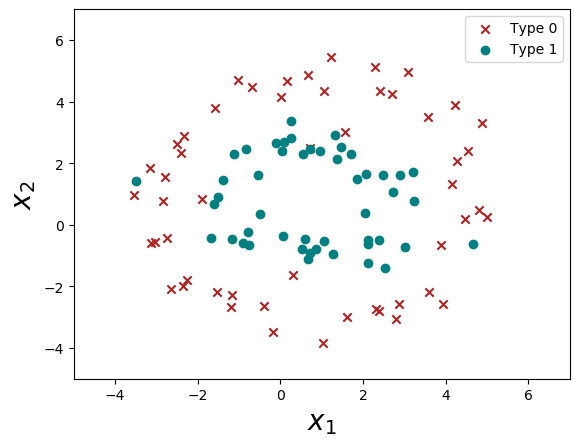

In [259]:

xlim(-5, 7)
ylim(-5, 7)

type_0 = findall(x->x==0, output)
type_0 = [type_0[n][1] for n=1:length(type_0)]
type_1 = findall(x->x==1, output)
type_1 = [type_1[n][1] for n=1:length(type_1)]

scatter(input[type_0, 2], input[type_0, 3], marker="x", c="firebrick", label="Type 0")
scatter(input[type_1, 2], input[type_1, 3], marker="o", c="teal", label="Type 1")

xlabel(L"x_1", fontsize=20)
ylabel(L"x_2", fontsize=20)
legend(loc="best", fontsize=10)

savefig("example.svg", optimize=true, format="svg", transparent=true)

# Sigmoid Function 

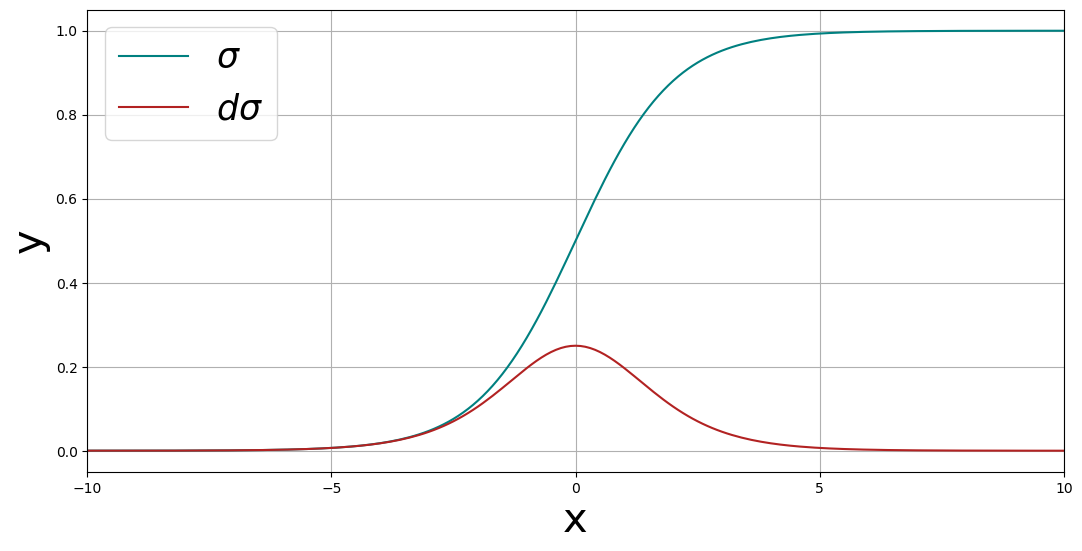

In [256]:
x = -12:0.1:12

figure(figsize=[12.6, 6.0])
plot(x, Sigmoid.(x), c="teal", label=L"\sigma")
plot(x, dSigmoid.(x), c="firebrick", label=L"d\sigma")
xticks([-10, -5, 0, 5, 10])
xlabel("x", fontsize=30)
ylabel("y", fontsize=30)
xlim(-10, 10)
grid()
legend(loc="best", fontsize=25)
savefig("sigmoid.svg", optimize=true, format="svg", transparent=true)

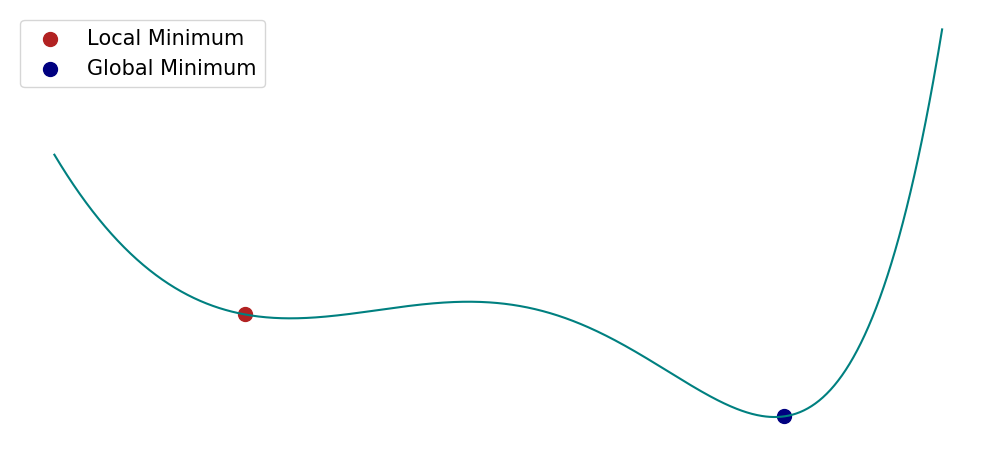

In [141]:
fig, ax = subplots()
ax.spines["right"].set_visible(false) 
ax.spines["left"].set_visible(false) 
ax.spines["bottom"].set_visible(false) 
ax.spines["top"].set_visible(false) 
fig.set_size_inches([12.6, 5.6])
x = [n for n in -3:0.01:4]
x = Array(mapFeature(x, 6)')
theta = [1, 2, -3, -2, 0.3, 0.1, 0.01]
y = theta' * x
plot(x[2, :], y, c="teal")
findall(x->x==-1.5, x)[1][2]
scatter(x[2, findall(x->x==-1.50, x)[1][2]], y[findall(x->x==-1.50, x)[1][2]], c="firebrick", s=100, label="Local Minimum")
scatter(x[2, findall(x->x==2.75, x)[1][2]], y[findall(x->x==2.75, x)[1][2]], c="navy", s=100, label="Global Minimum")

legend(loc="best", fontsize=15)
xticks([])
yticks([])
savefig("unconvex.svg", optimize=true, format="svg", transparent=true)

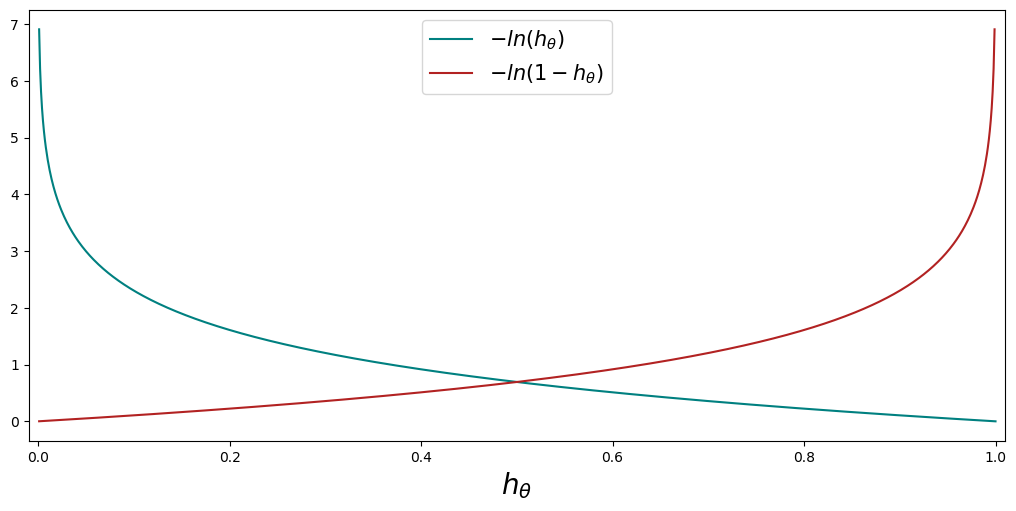

In [161]:
x = [n for n in 0.001:0.001:1]

fig, ax = subplots()
fig.set_size_inches([12.6, 5.6])
xlim([-0.01, 1.01])
plot(x, -log.(x), label=L"-ln(h_{\theta})", c="teal")
plot(x, -log.(1 .-x), label=L"-ln(1-h_{\theta})", c="firebrick")
xlabel(L"h_{\theta}", fontsize=20)
legend(loc="best", fontsize=15)
savefig("ce.svg", optimize=true, format="svg", transparent=true)